In [2]:
# Gerekli Kütüphaneler
import pandas as pd
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [3]:
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv"
df = pd.read_csv(url)

In [4]:
print(df.head())

                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [5]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [6]:
df["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [7]:
df["Text"].value_counts()

haec commentatio automatice praeparata res astronomicas colligit excerptas e pagina [] sitús small-body database quem elaboraverunt nasa et jpl apud institutum technologiae californiense                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    48
இக்கோயில் முதன்மைத் திருக்கோயில் என்ற வகைப்பாட்டில் இந்

In [8]:
# Veri Ön İşleme Adımları
def text_processing(text):
    # 1. Metin Temizleme
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    # 2. Tokenization
    words = word_tokenize(text)

    # 3. Stop Words Çıkarımı
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # 4. Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # 5. Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

In [9]:
df['Text'] = df['Text'].apply(text_processing)

In [10]:
# Özellik Çıkarımı
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text'])
y = df['language']

In [11]:
# Eğitim-Test Seti Ayırımı
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Multinomial Naive Bayes sınıflandırıcısı
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb.score(X_test,y_test)

0.9475

In [13]:
# Logistic Regression sınıflandırıcısı
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr.score(X_test,y_test)

0.9563636363636364

In [14]:
# Linear Support Vector Classifier sınıflandırıcısı
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm.score(X_test,y_test)

0.9681818181818181

In [15]:
# Random Forest Classifier sınıflandırıcısı
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf.score(X_test,y_test)

0.9188636363636363

In [16]:
# K Neighbors Classifier sınıflandırıcısı, 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn.score(X_test,y_test)

0.9543181818181818

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
# Veri setini yükle
df = pd.read_csv("Naive-Bayes-Classification-Data.csv")
# Eksik değerleri kontrol et
print(df.isnull().sum())
# One-hot encoding işlemi
df = pd.get_dummies(df, columns=['glucose', 'bloodpressure'])
# Bağımsız ve bağımlı değişkenleri ayır
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# Veriyi ölçeklendirme
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train_scaled, y_train)
multinomial_cv = cross_validate(estimator=multinomial_nb,
                                X=x_valid_scaled, y=y_valid,
                                cv=5, return_train_score=True)

multinomial_mean_train_score = round((multinomial_cv['train_score'] * 100).mean(), 3)
multinomial_mean_test_score = round((multinomial_cv['test_score'] * 100).mean(), 3)
print(f'Mean train score: {multinomial_mean_train_score}')
print(f'Mean test score: {multinomial_mean_test_score}')
multinomial_nb_pred = cross_val_predict(multinomial_nb, X, y, cv=5)
cm = confusion_matrix(y, multinomial_nb_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix - Multinoimal NB')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()
multinoimal_nb_pred_prob = cross_val_predict(multinomial_nb, X, y, cv=5, method='predict_proba')
multinoimal_nb_pred_prob = multinoimal_nb_pred_prob[:, 1]
# ROC eğrisini hesapla
fpr, tpr, thresholds = roc_curve(y, multinoimal_nb_pred_prob)
roc_auc = auc(fpr, tpr)
# ROC eğrisini çiz
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
# Decision Tree Classifier sınıflandırıcısı
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt.score(X_test,y_test)

0.8895454545454545

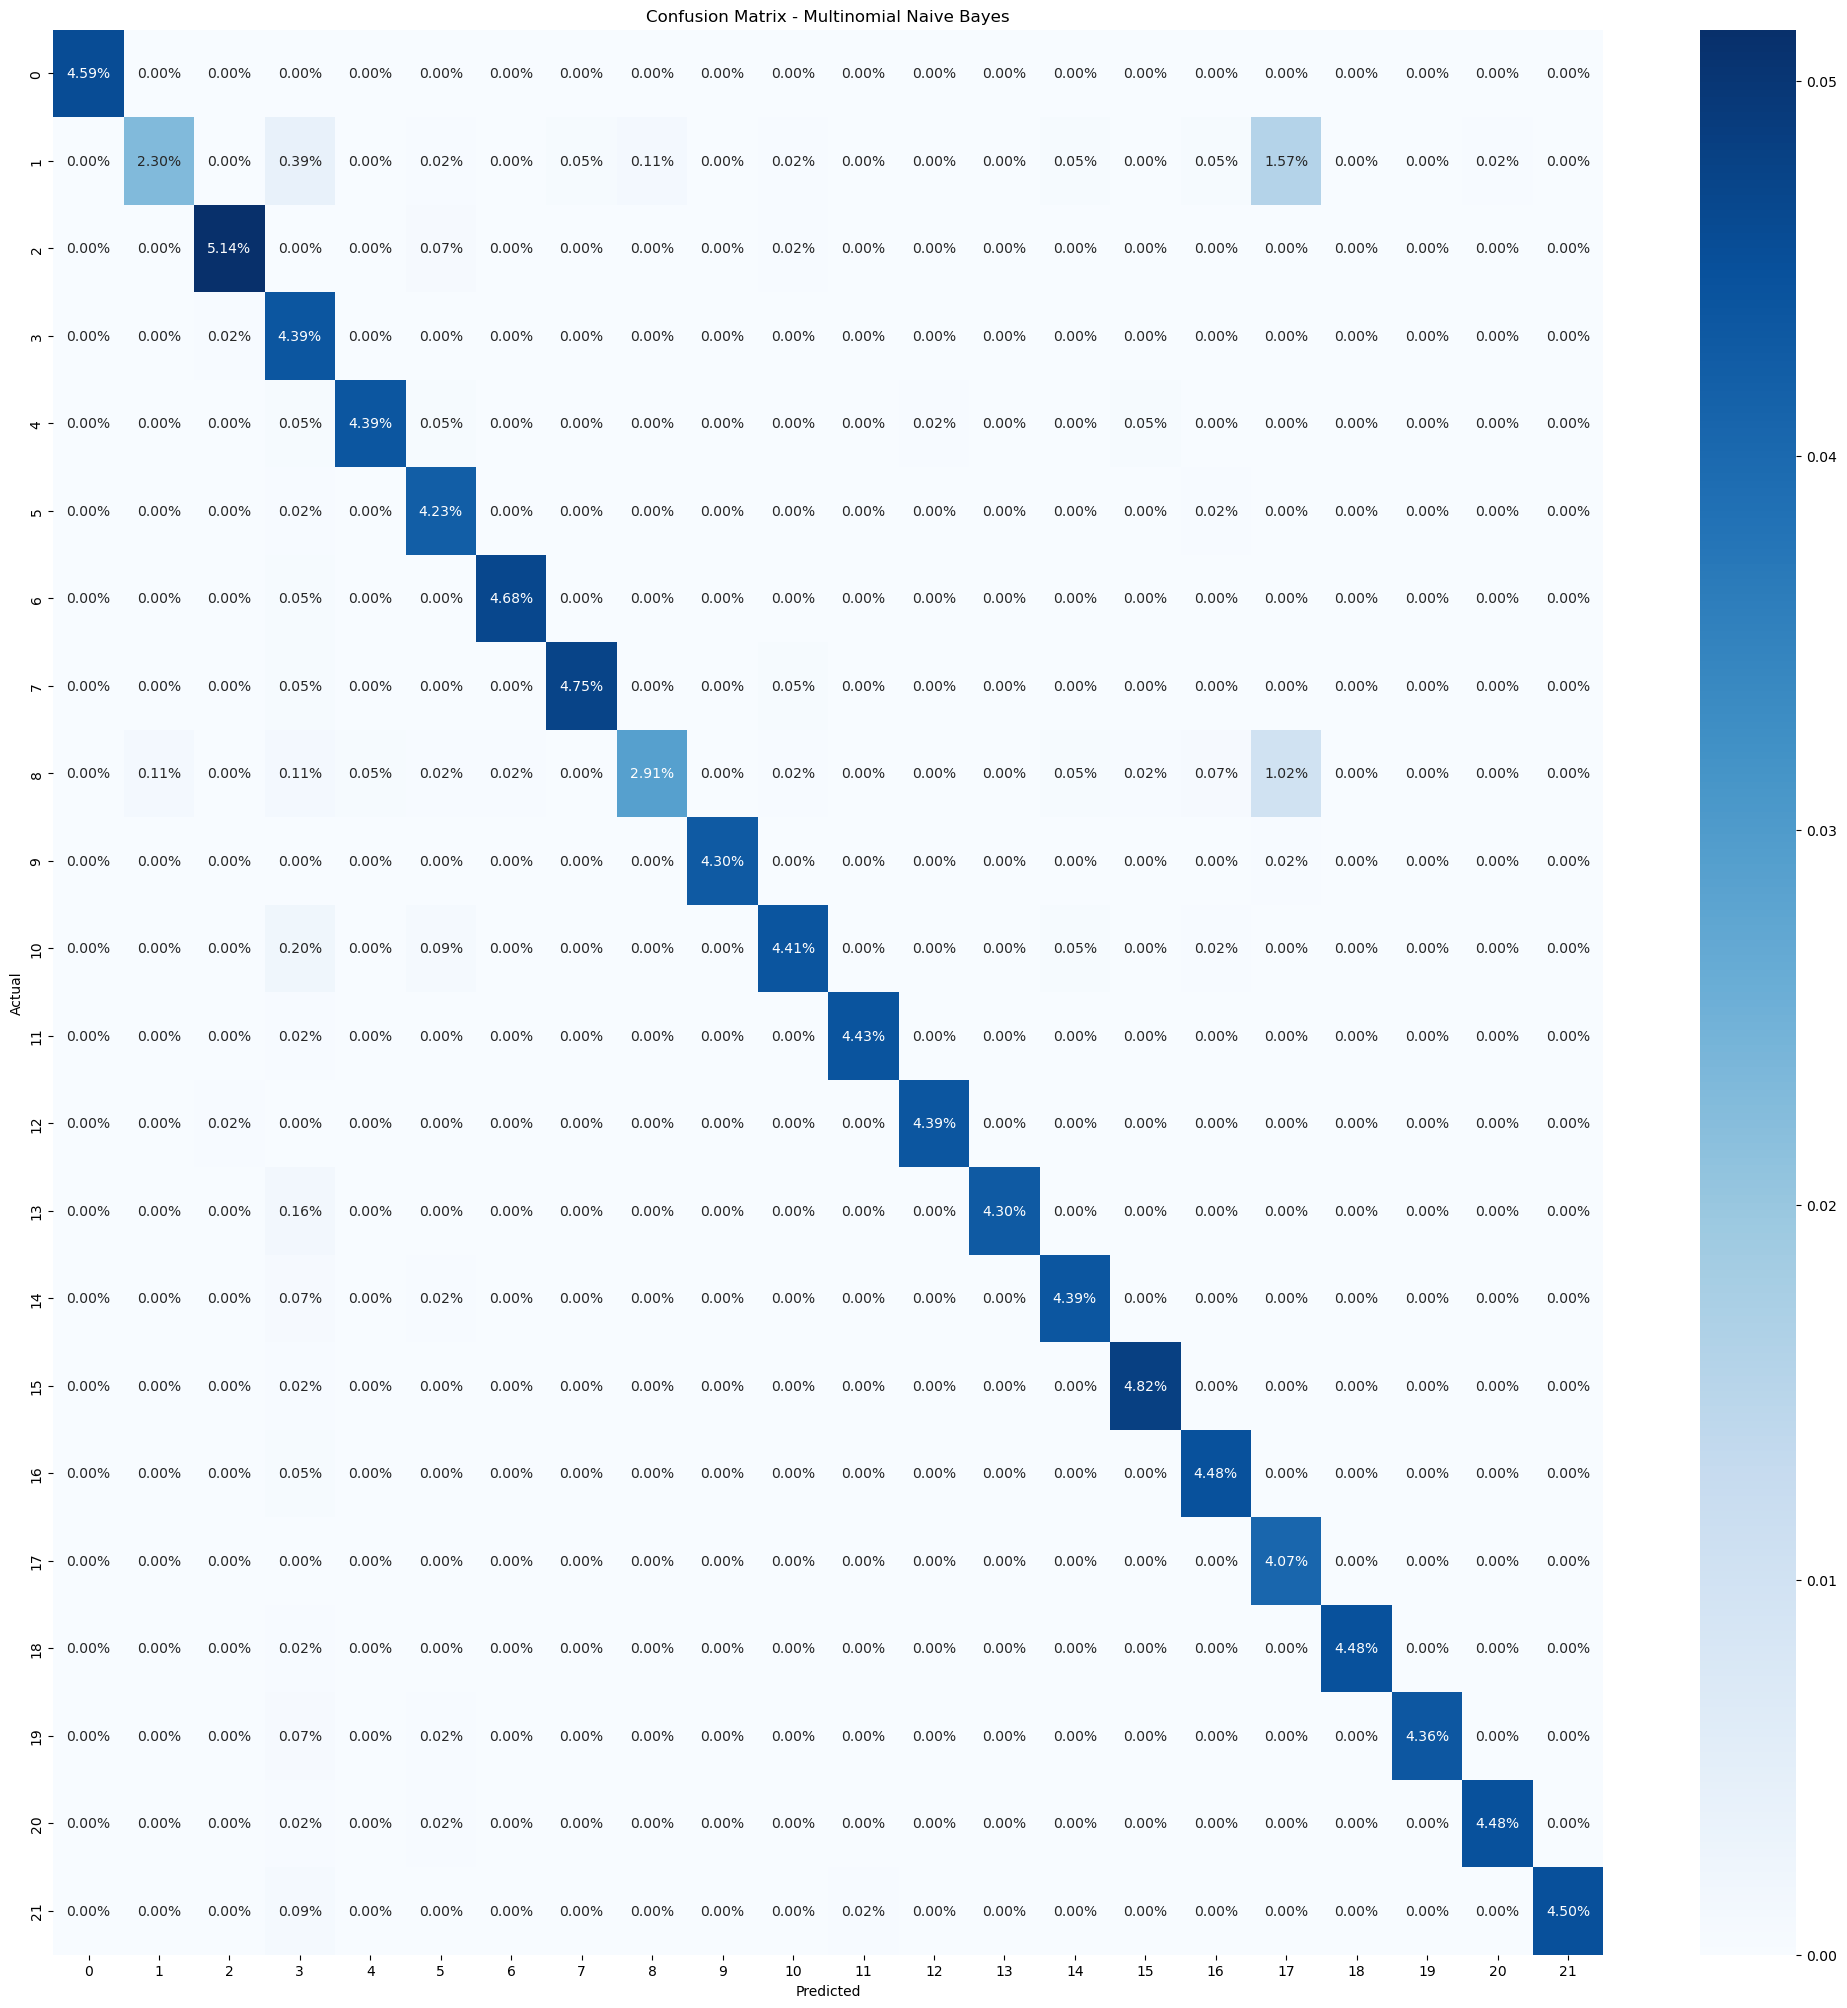

In [18]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(25,25))
sns.heatmap(cm_nb/np.sum(cm_nb), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

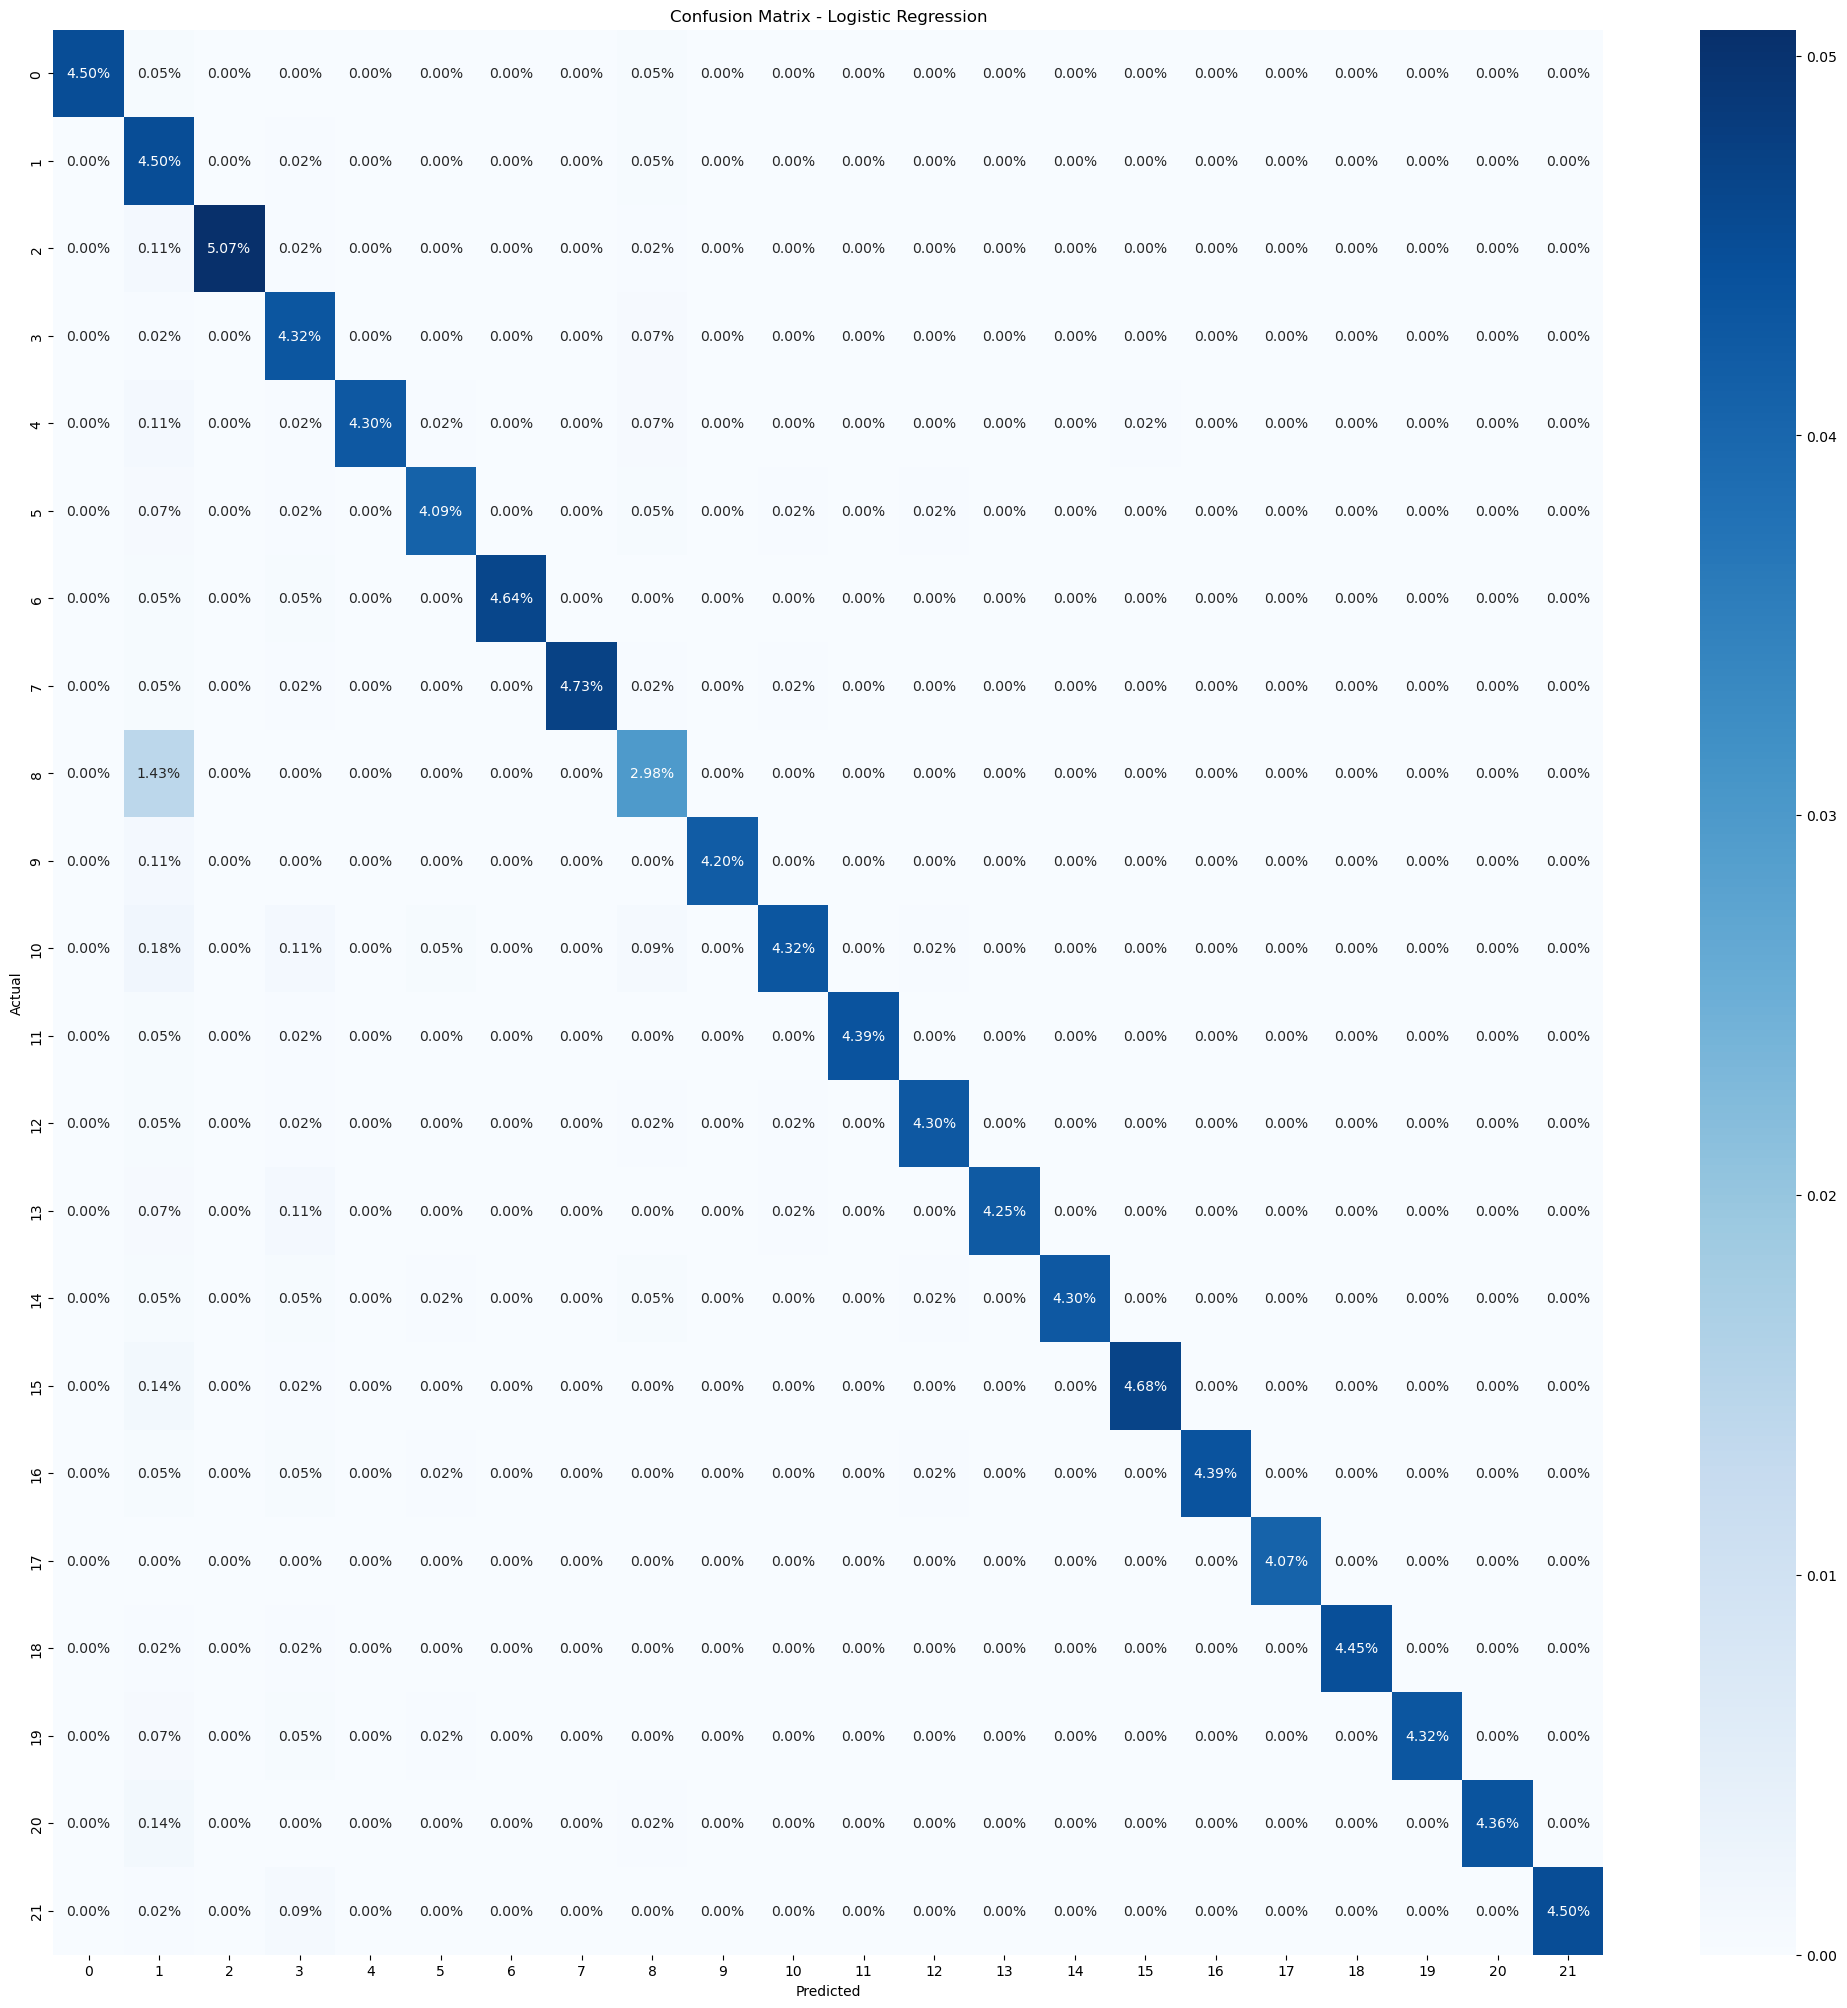

In [19]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(25,25))
sns.heatmap(cm_lr/np.sum(cm_lr), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

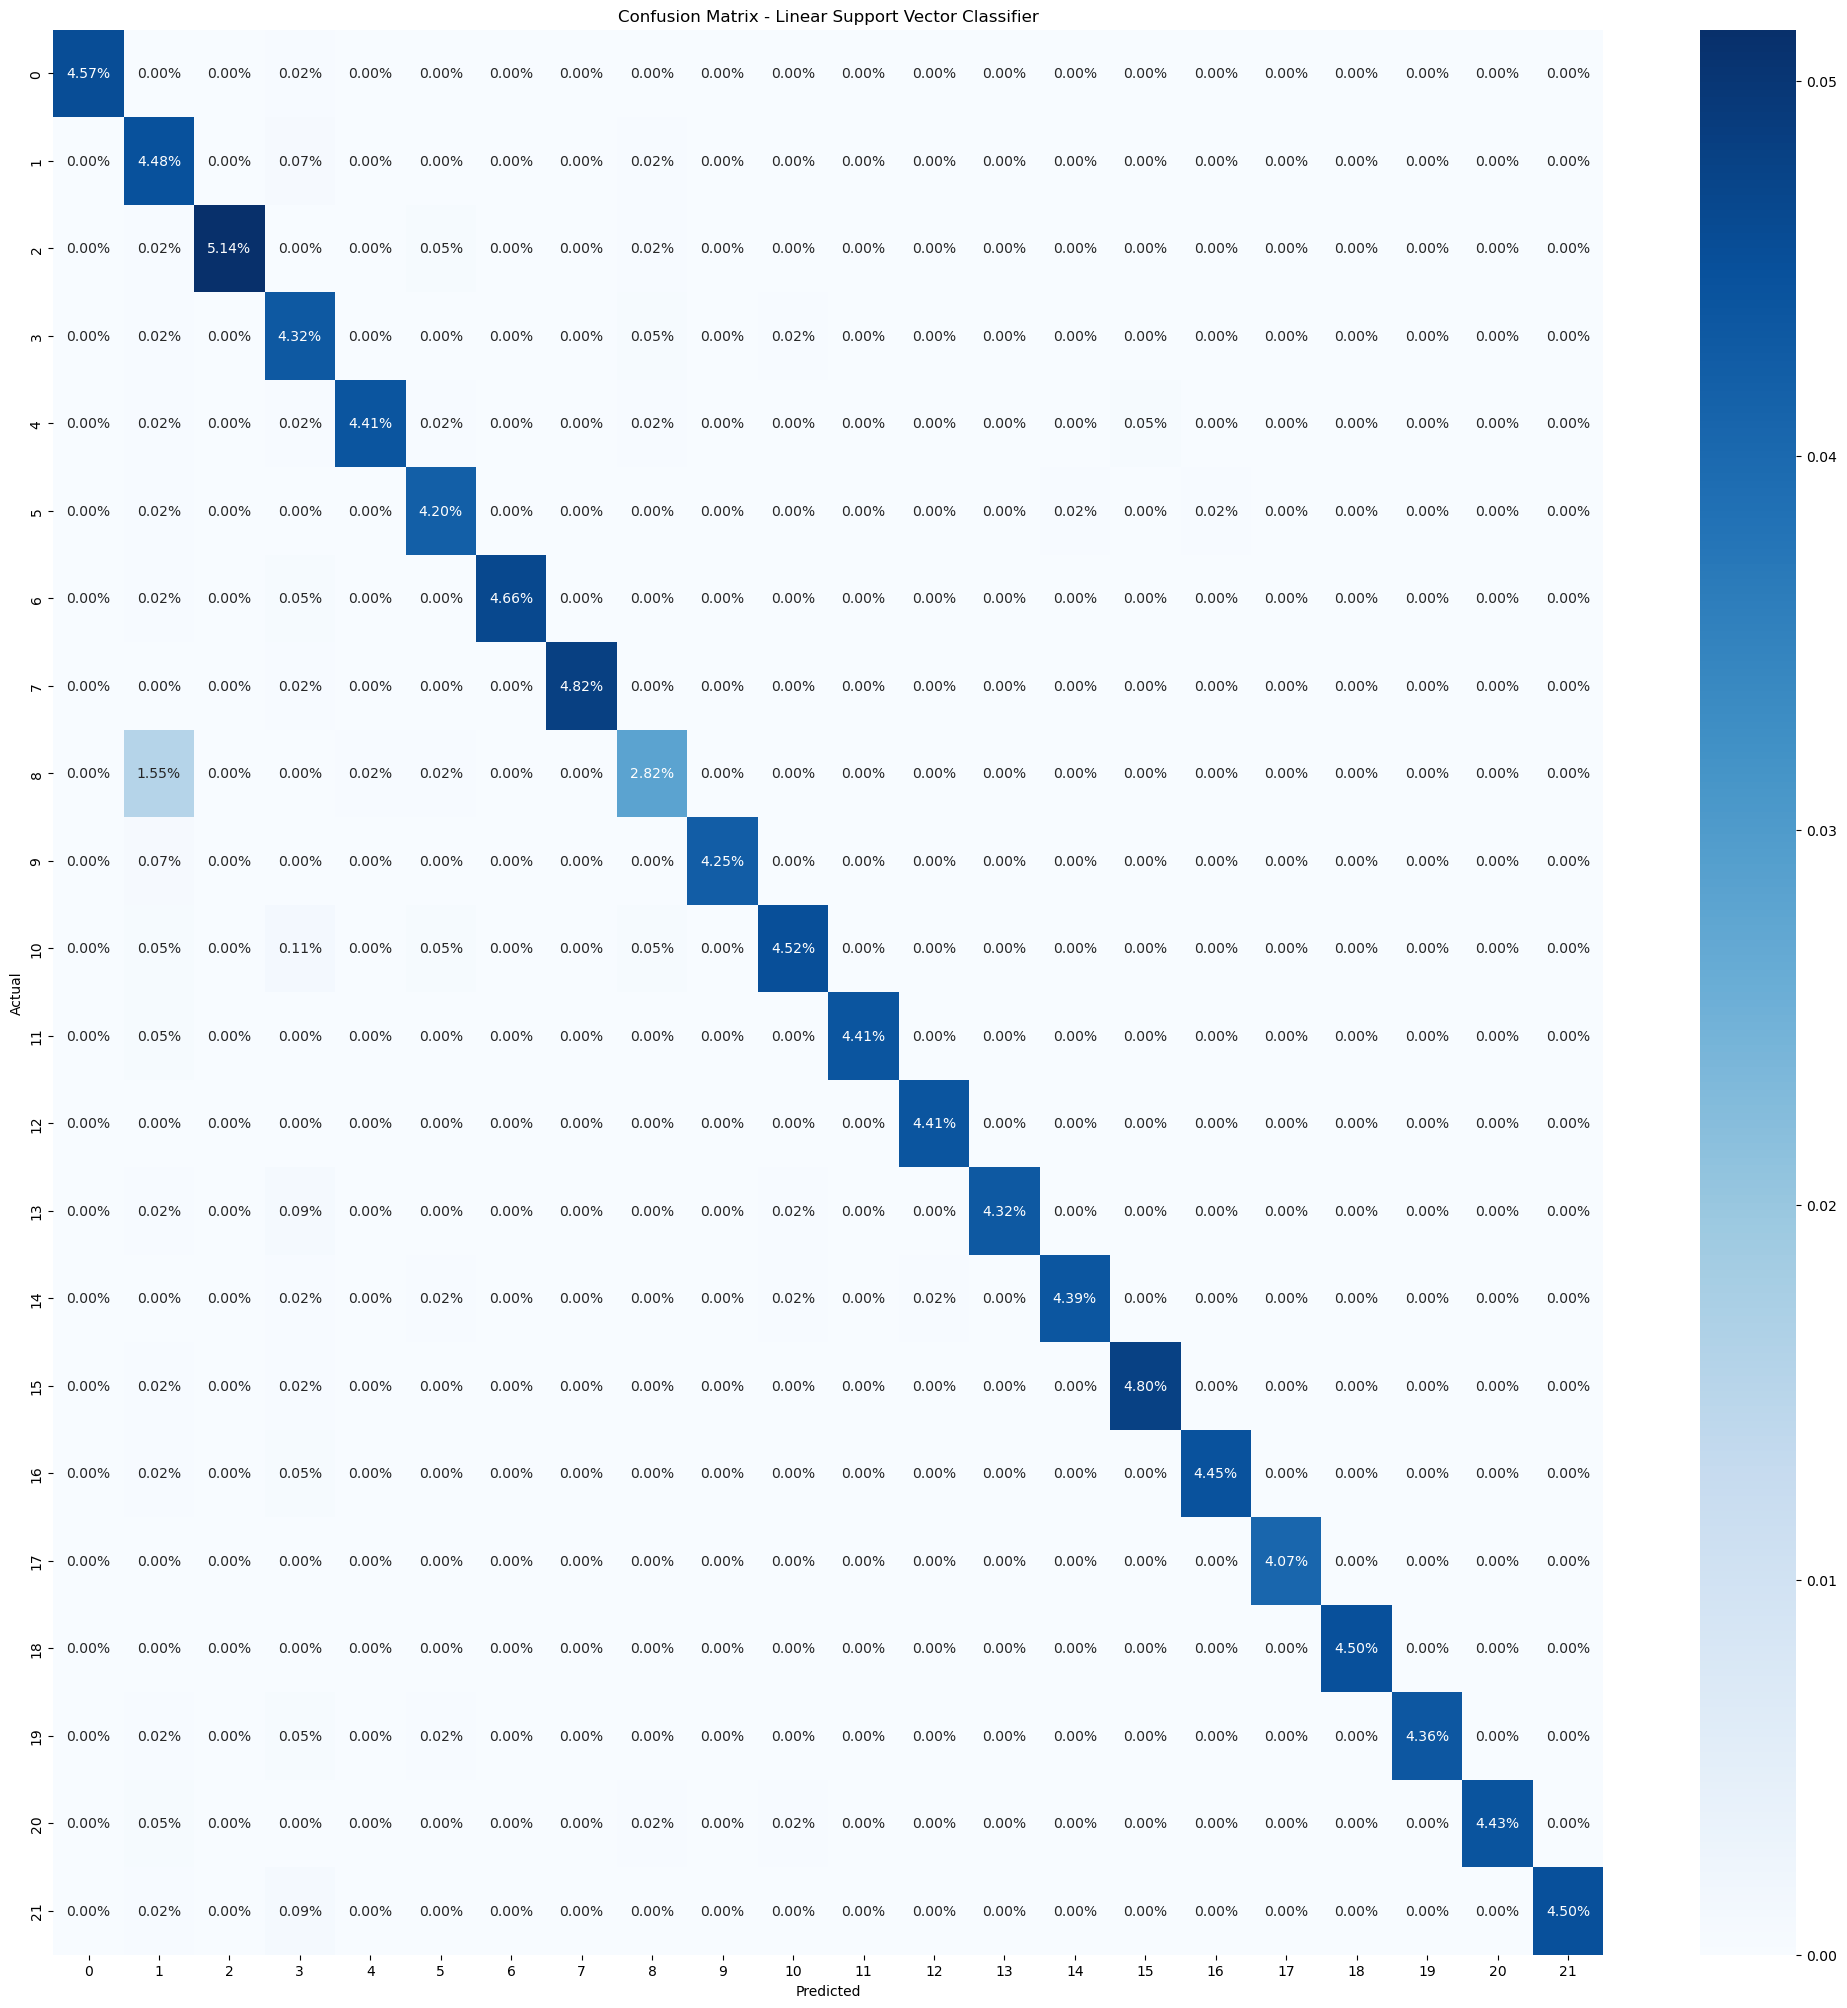

In [20]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(25,25))
sns.heatmap(cm_svm/np.sum(cm_svm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - Linear Support Vector Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

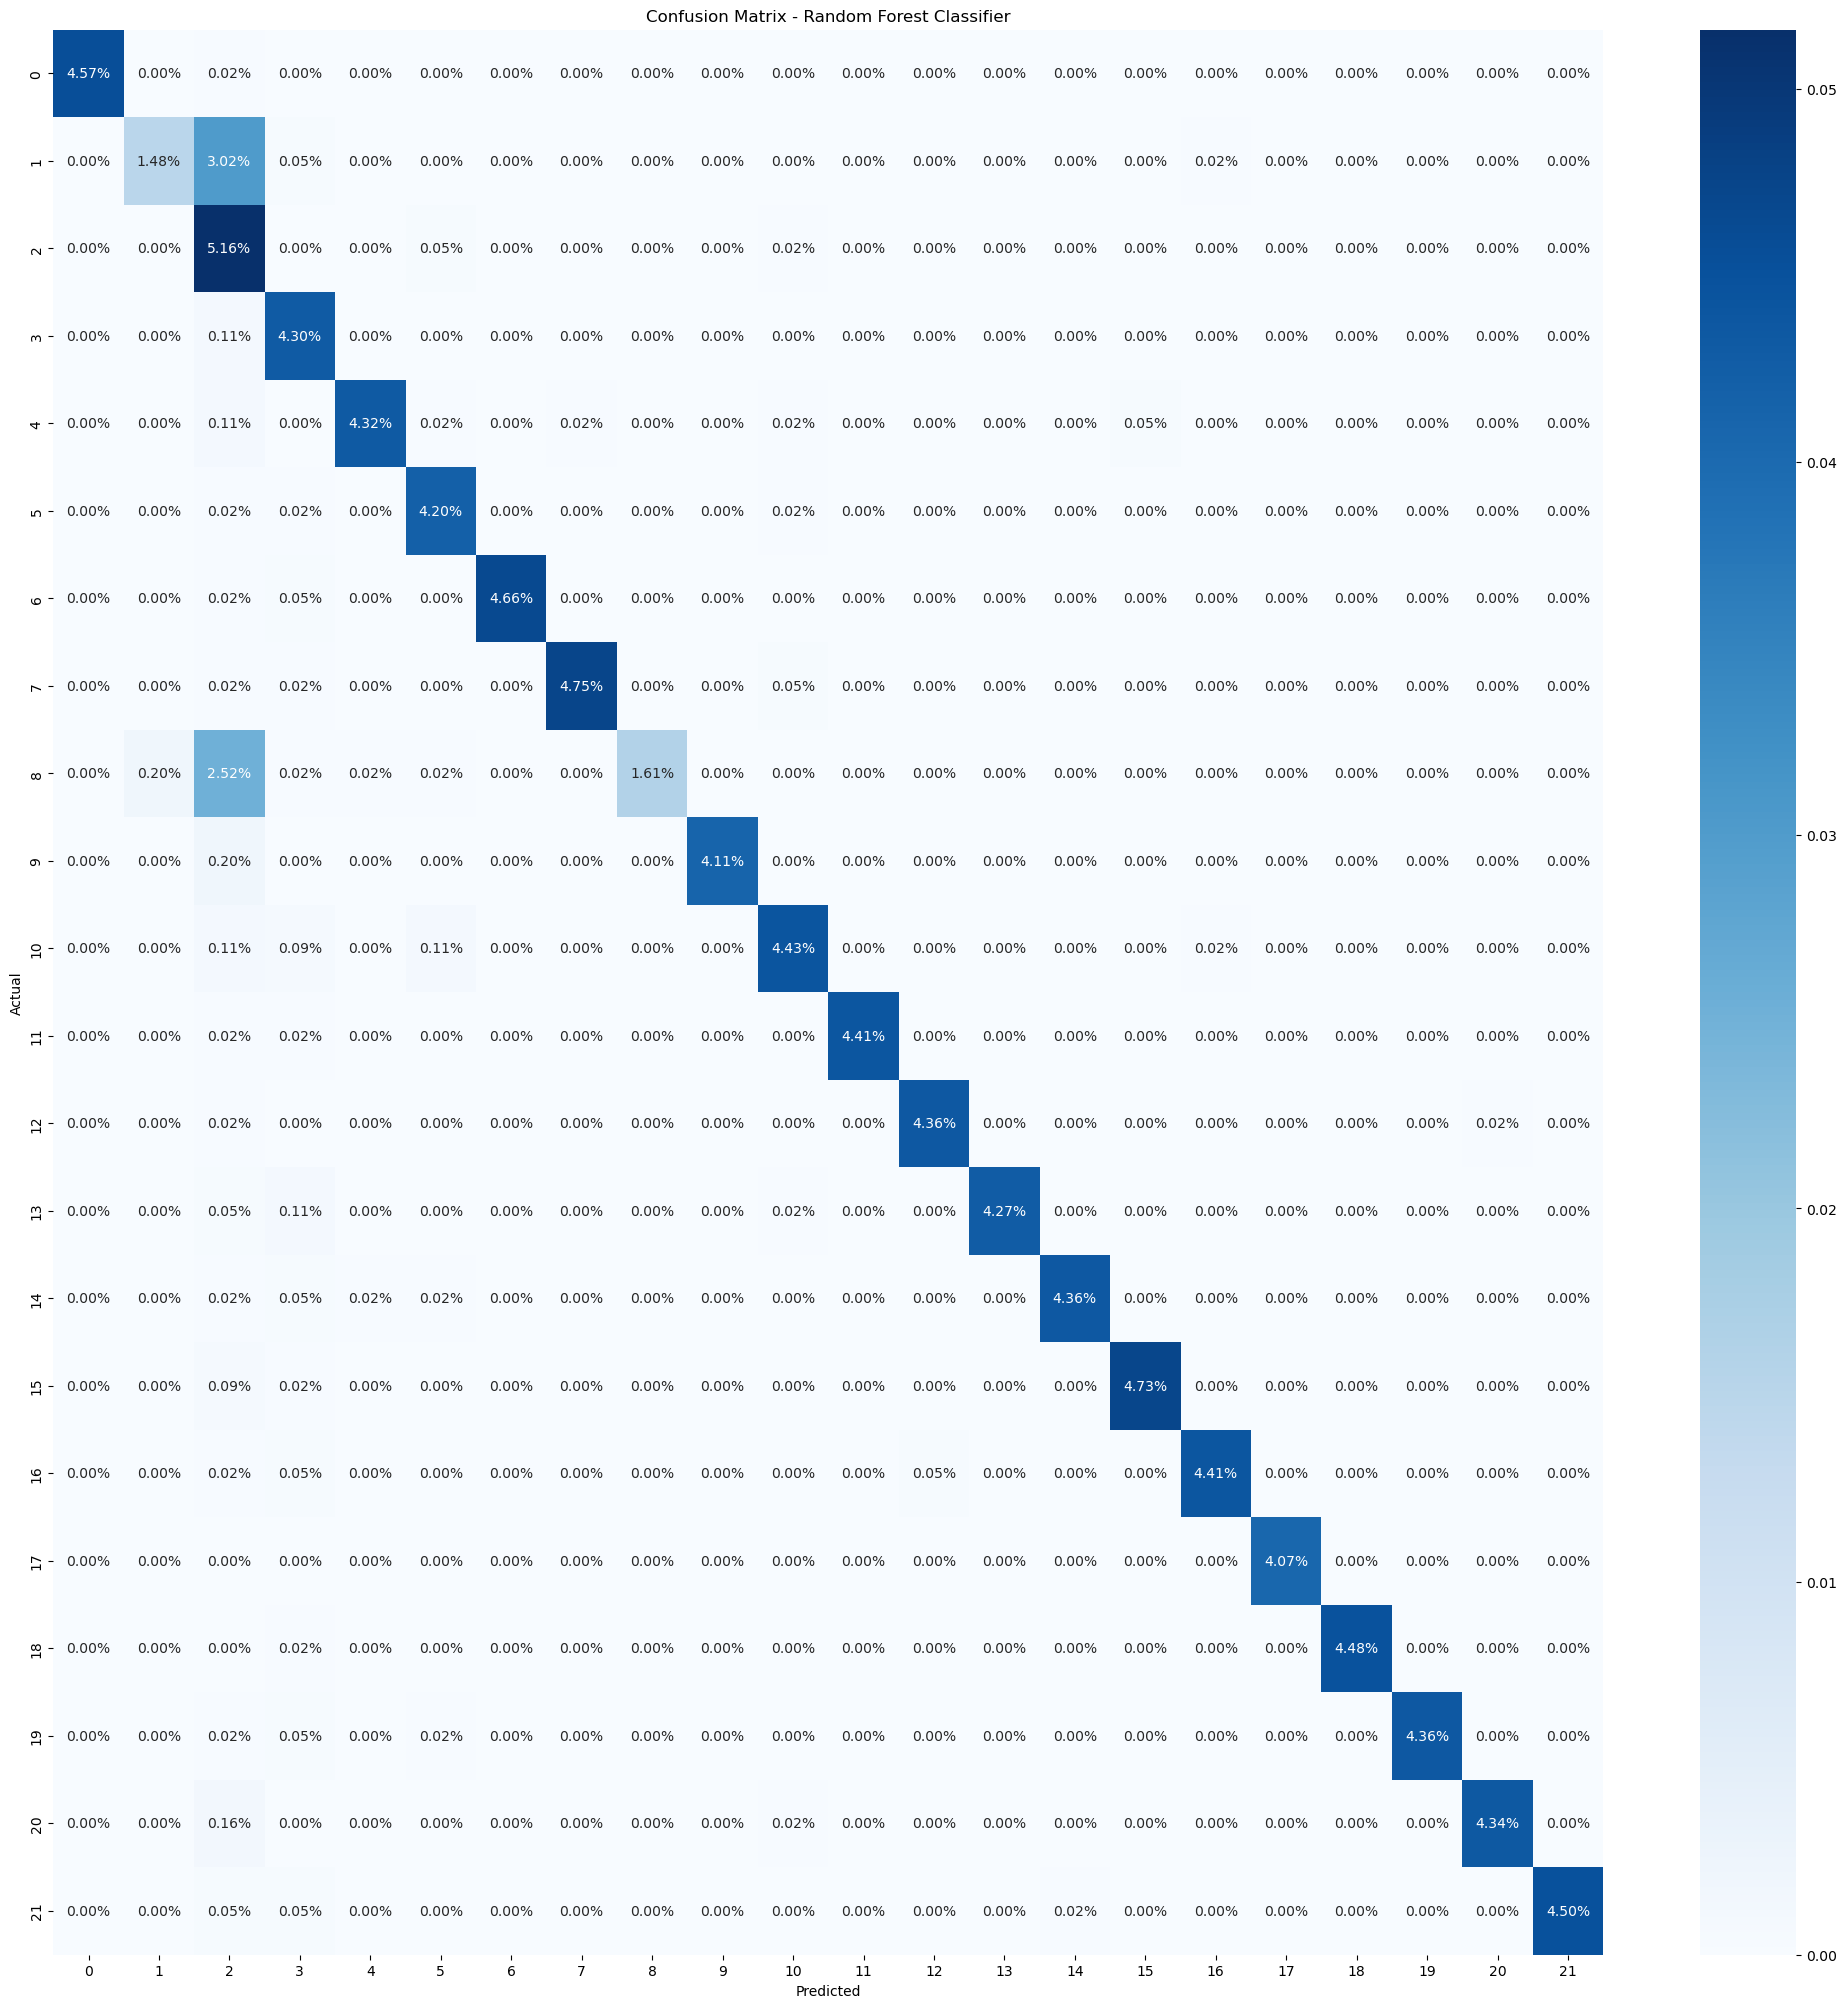

In [21]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(25,25))
sns.heatmap(cm_rf/np.sum(cm_rf), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

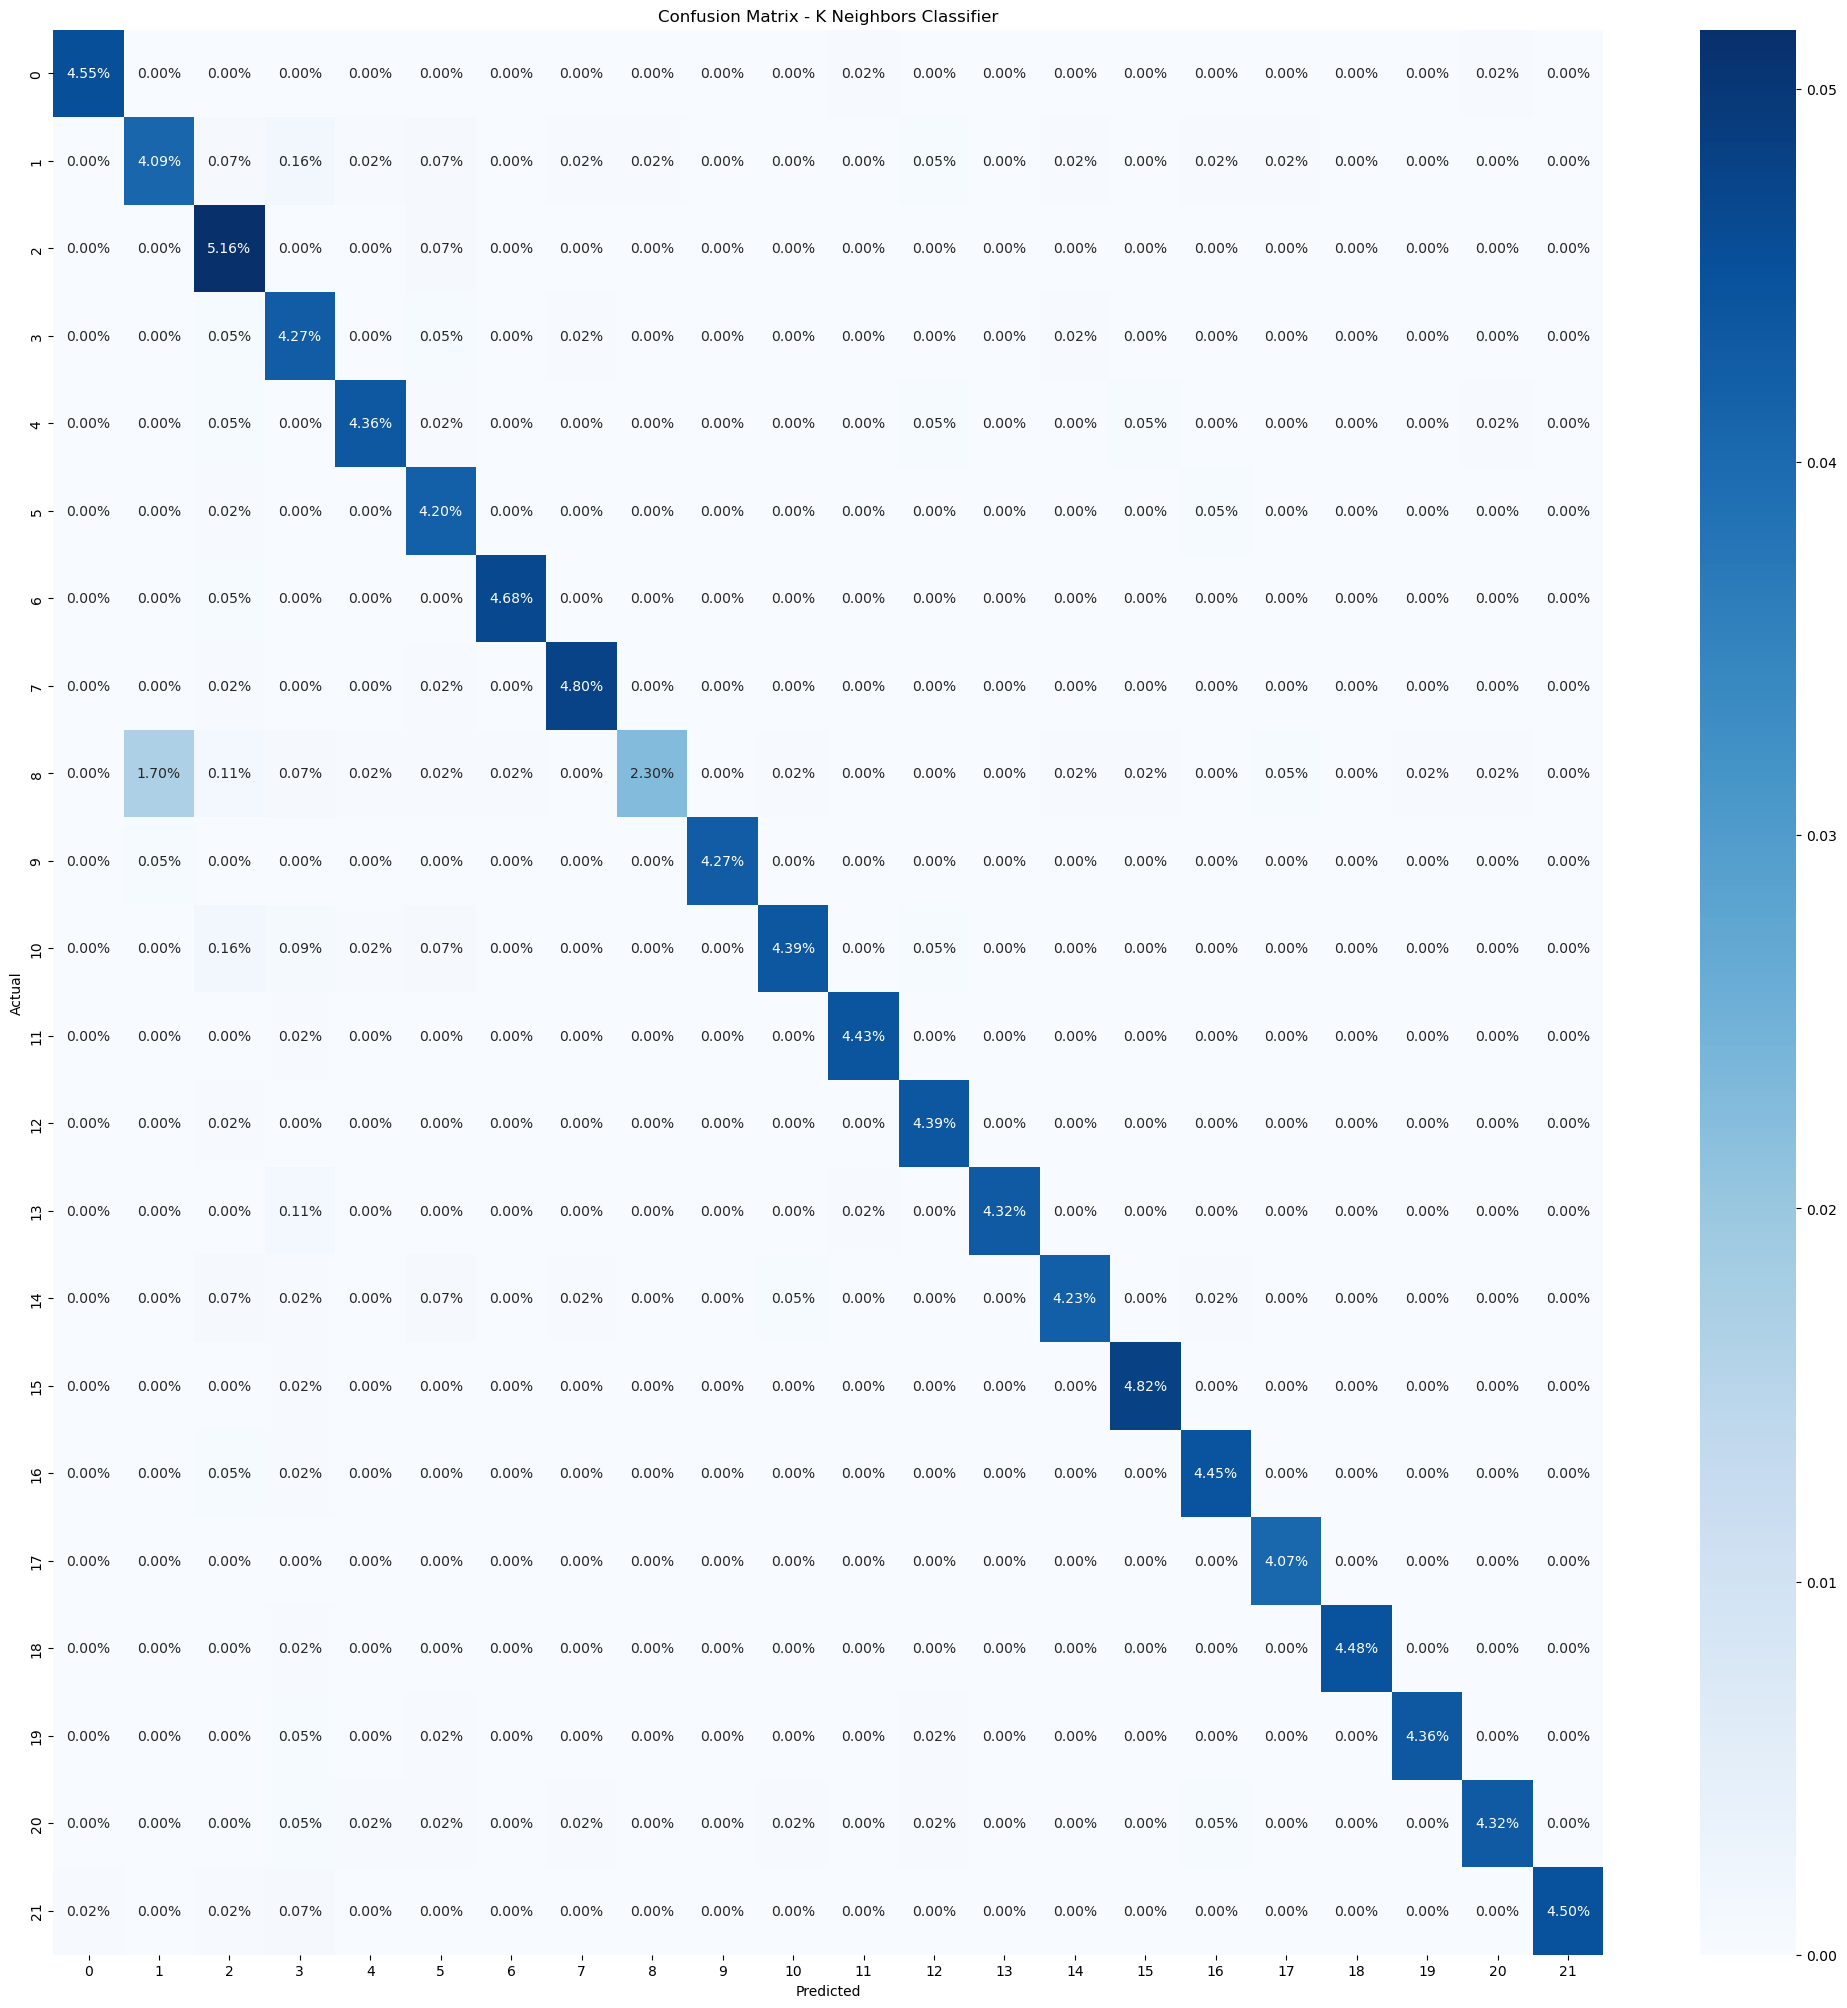

In [22]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(25,25))
sns.heatmap(cm_knn/np.sum(cm_knn), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - K Neighbors Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

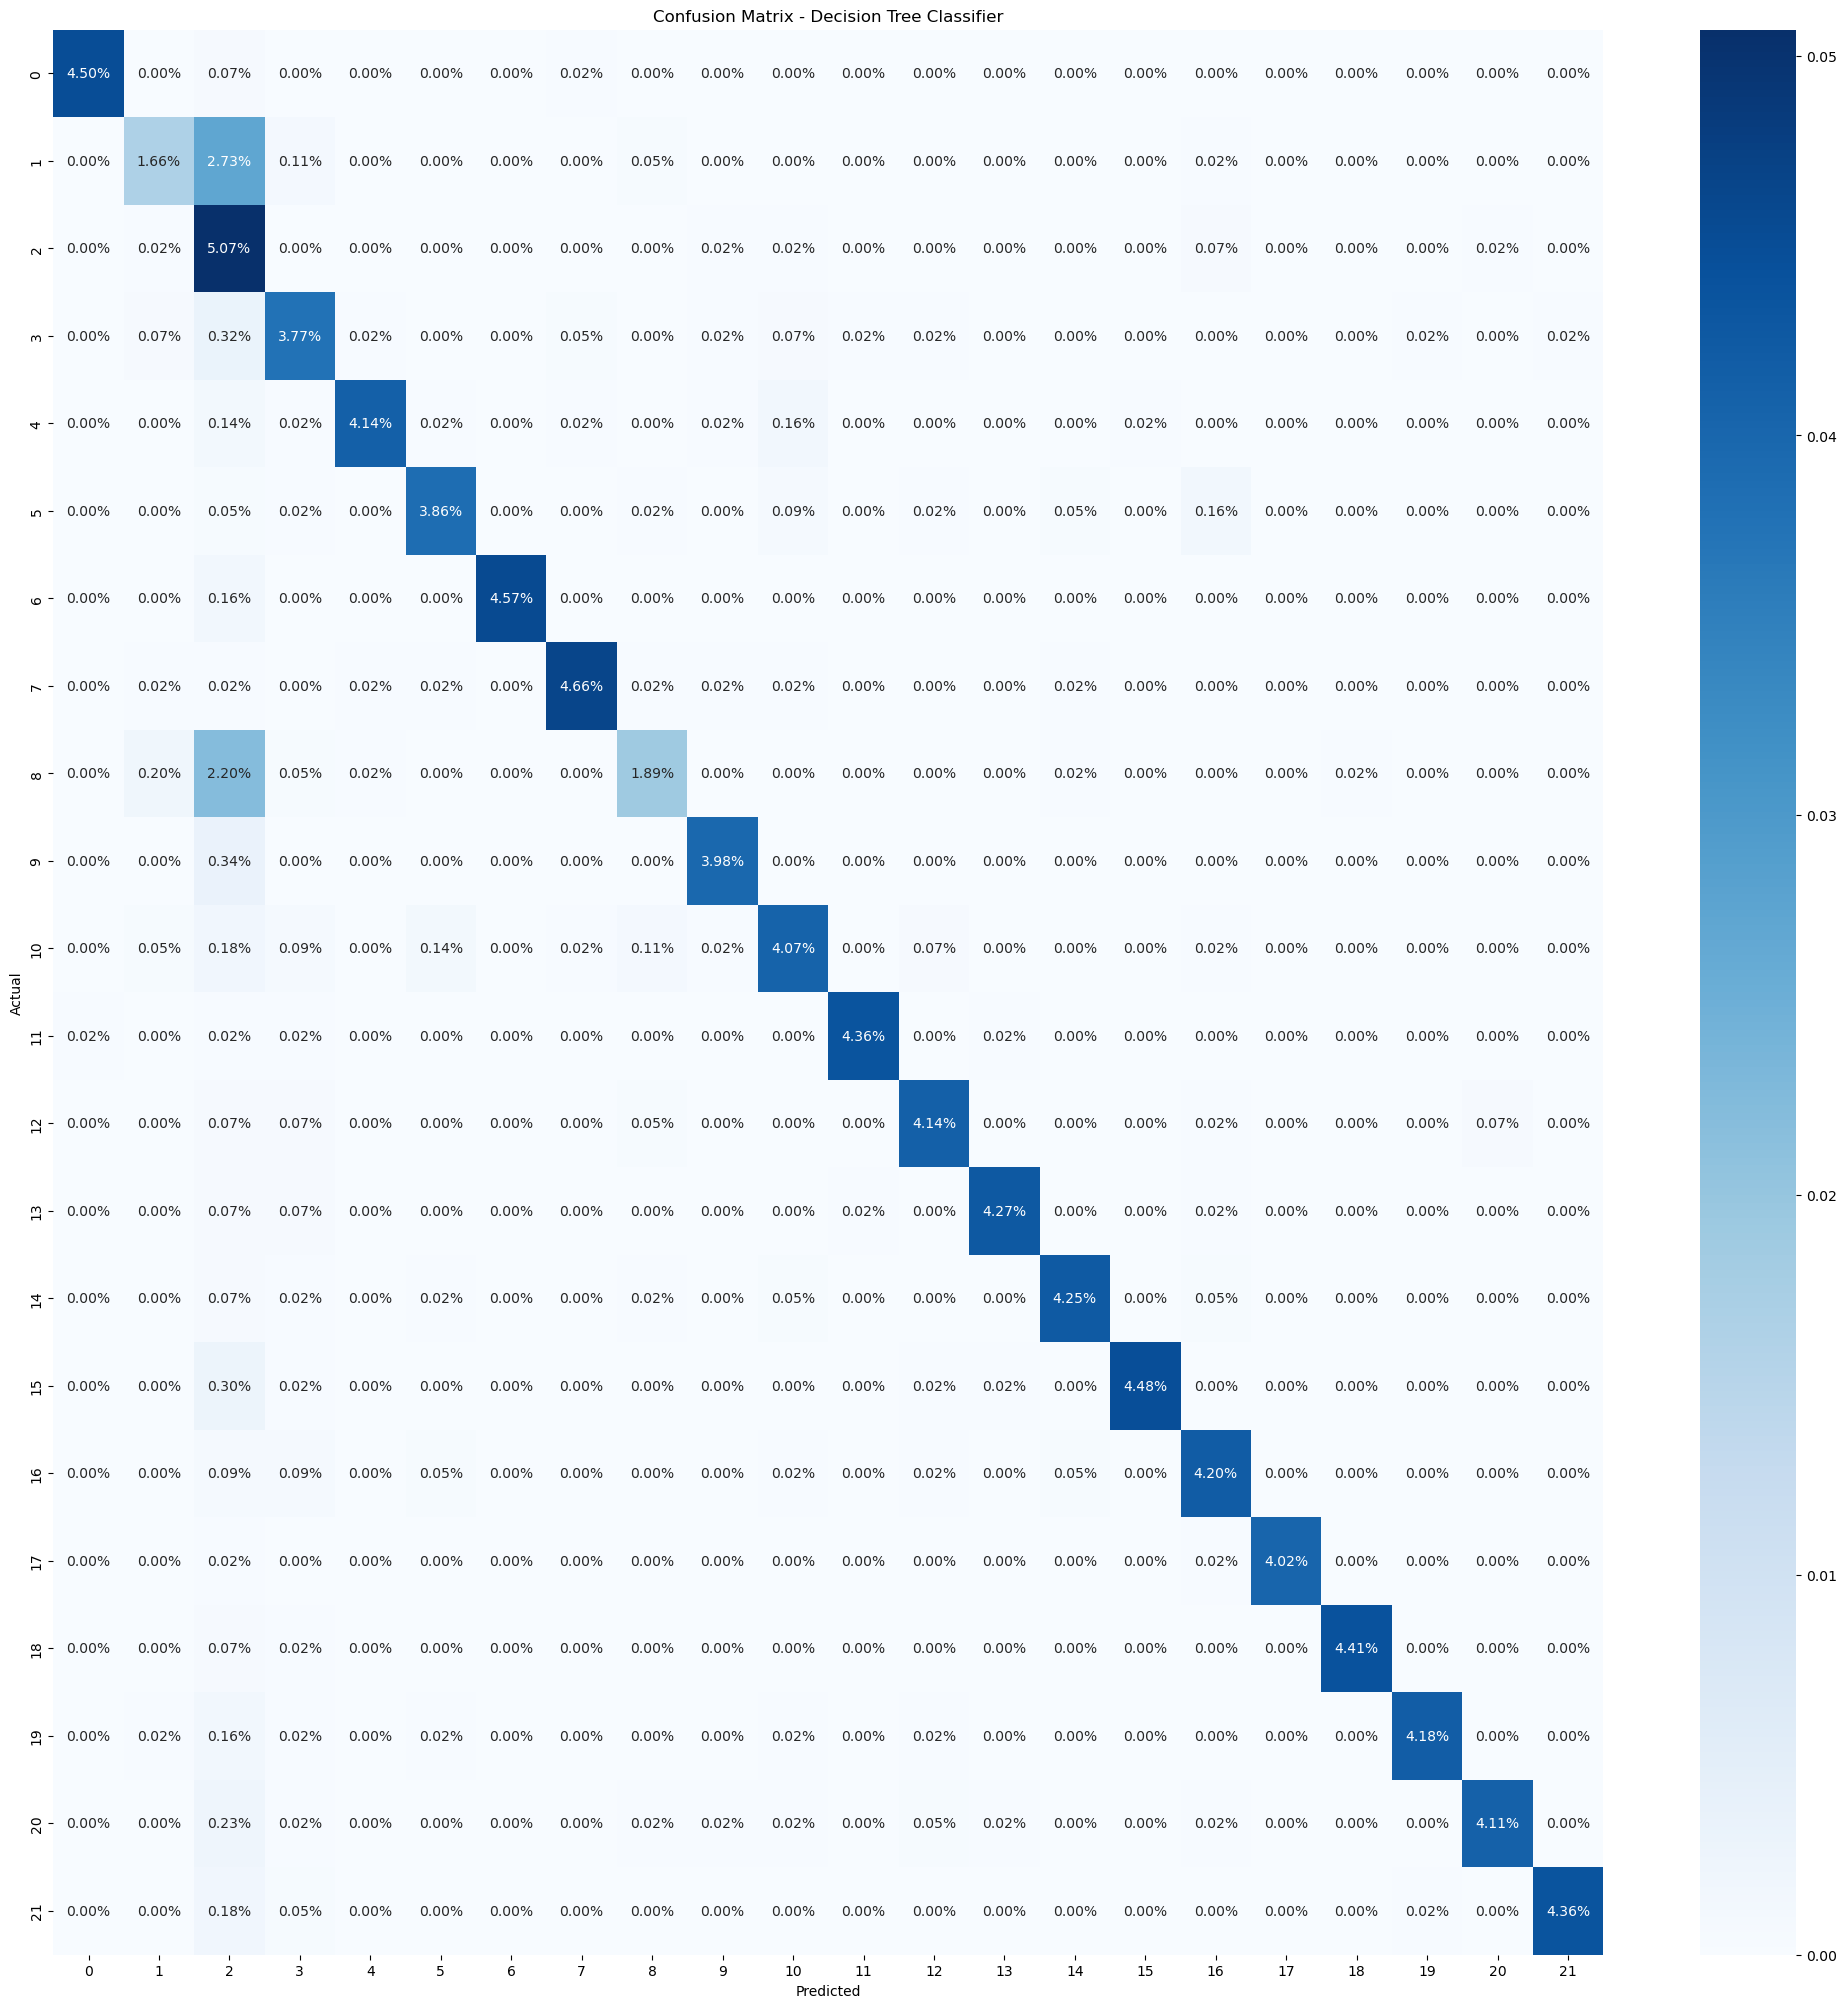

In [23]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(25,25))
sns.heatmap(cm_dt/np.sum(cm_dt), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Multinomial Naive Bayes Log-Loss: 0.5772939123873512


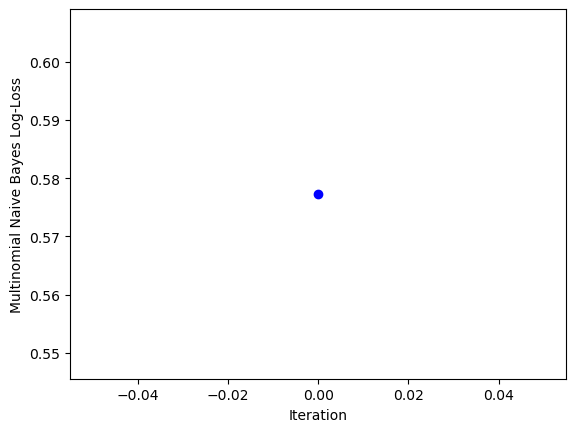

In [24]:
from sklearn.metrics import log_loss

y_pred_prob_nb = nb.predict_proba(X_test) # sınıf olasılıkları
logloss_nb = log_loss(y_test, y_pred_prob_nb)
print("Multinomial Naive Bayes Log-Loss:", logloss_nb)
plt.plot(logloss_nb, 'bo-')
plt.xlabel('Iteration')
plt.ylabel('Multinomial Naive Bayes Log-Loss')
plt.show()

Multinomial Naive Bayes Log-Loss: 0.5337410343566822


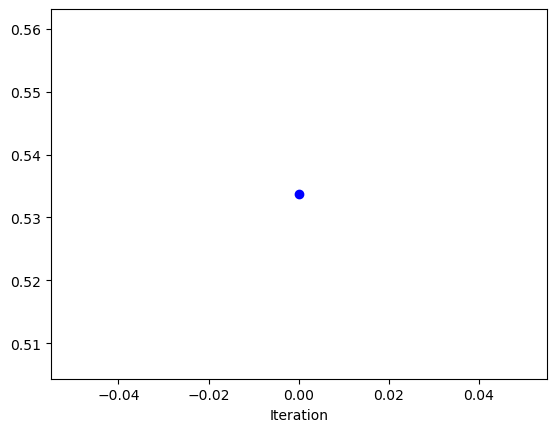

In [25]:
from sklearn.metrics import log_loss

y_pred_prob_lr = lr.predict_proba(X_test) # sınıf olasılıkları
logloss_lr = log_loss(y_test, y_pred_prob_lr)
print("Multinomial Naive Bayes Log-Loss:", logloss_lr)
plt.plot(logloss_lr, 'bo-')
plt.xlabel('Iteration')
plt.show()

Multinomial Naive Bayes Log-Loss: 0.36277601214793825


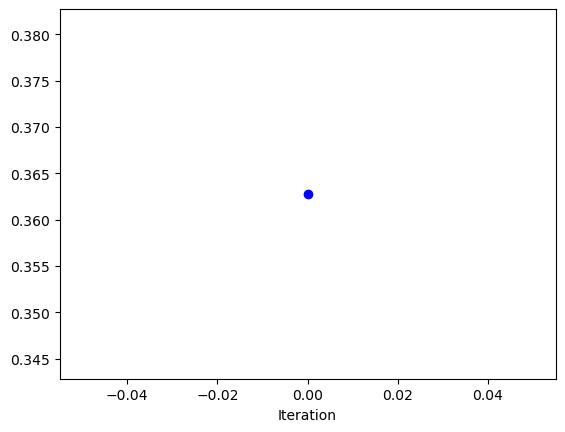

In [26]:
from sklearn.metrics import log_loss

y_pred_prob_rf = rf.predict_proba(X_test) # sınıf olasılıkları
logloss_rf = log_loss(y_test, y_pred_prob_rf)
print("Multinomial Naive Bayes Log-Loss:", logloss_rf)
plt.plot(logloss_rf, 'bo-')
plt.xlabel('Iteration')
plt.show()

In [30]:

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.95      0.50      0.66       201
       Dutch       0.99      0.98      0.99       230
     English       0.76      0.99      0.86       194
    Estonian       0.99      0.96      0.98       200
      French       0.93      0.99      0.96       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       0.99      0.98      0.99       213
    Japanese       0.96      0.66      0.78       194
      Korean       1.00      0.99      1.00       190
       Latin       0.97      0.92      0.95       210
     Persian       0.99      0.99      0.99       196
   Portugese       0.99      0.99      0.99       194
      Pushto       1.00      0.96      0.98       196
    Romanian       0.97      0.98      0.97       197
     Russian       0.99      1.00      0.99       213
     Spanish       0.97      0.99 

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       202
     Chinese       0.61      0.99      0.76       201
       Dutch       1.00      0.97      0.98       230
     English       0.86      0.98      0.92       194
    Estonian       1.00      0.94      0.97       200
      French       0.97      0.96      0.96       188
       Hindi       1.00      0.98      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       0.86      0.68      0.76       194
      Korean       1.00      0.97      0.99       190
       Latin       0.98      0.90      0.94       210
     Persian       1.00      0.98      0.99       196
   Portugese       0.98      0.97      0.98       194
      Pushto       1.00      0.95      0.98       196
    Romanian       1.00      0.96      0.98       197
     Russian       1.00      0.97      0.98       213
     Spanish       1.00      0.97 

In [32]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Linear SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Linear SVM Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.69      0.98      0.81       201
       Dutch       1.00      0.98      0.99       230
     English       0.88      0.98      0.92       194
    Estonian       0.99      0.97      0.98       200
      French       0.96      0.98      0.97       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      1.00      1.00       213
    Japanese       0.94      0.64      0.76       194
      Korean       1.00      0.98      0.99       190
       Latin       0.98      0.95      0.96       210
     Persian       1.00      0.99      0.99       196
   Portugese       0.99      1.00      1.00       194
      Pushto       1.00      0.97      0.98       196
    Romanian       0.99      0.98      0.99       197
     Russian       0.99      0.99      0.99       213
     Spanish       0.99      0.98      0.99    

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       202
     Chinese       0.88      0.32      0.47       201
       Dutch       0.44      0.99      0.61       230
     English       0.87      0.96      0.92       194
    Estonian       0.99      0.95      0.97       200
      French       0.94      0.98      0.96       188
       Hindi       1.00      0.98      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       0.99      0.38      0.55       194
      Korean       1.00      0.95      0.98       190
       Latin       0.96      0.92      0.94       210
     Persian       1.00      0.99      0.99       196
   Portugese       0.99      1.00      0.99       194
      Pushto       1.00      0.96      0.98       196
    Romanian       0.99      0.97      0.98       197
     Russian       0.99      0.97      0.98       213
     Spanish       0.98      0.97      0.97 

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.99      0.99       202
     Chinese       0.70      0.90      0.79       201
       Dutch       0.88      0.99      0.93       230
     English       0.86      0.97      0.91       194
    Estonian       0.98      0.96      0.97       200
      French       0.91      0.98      0.94       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       0.98      0.99      0.99       213
    Japanese       0.99      0.52      0.68       194
      Korean       1.00      0.99      0.99       190
       Latin       0.98      0.92      0.95       210
     Persian       0.99      0.99      0.99       196
   Portugese       0.96      0.99      0.98       194
      Pushto       1.00      0.97      0.98       196
    Romanian       0.98      0.94      0.96       197
     Russian       0.99      1.00      0.99       213
     Spanish       0.97      0.98     

In [35]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

      Arabic       0.99      0.99      0.99       202
     Chinese       0.82      0.38      0.52       201
       Dutch       0.42      0.97      0.59       230
     English       0.86      0.86      0.86       194
    Estonian       0.98      0.90      0.94       200
      French       0.93      0.91      0.92       188
       Hindi       0.99      0.96      0.98       208
  Indonesian       0.96      0.96      0.96       213
    Japanese       0.91      0.44      0.60       194
      Korean       0.97      0.93      0.95       190
       Latin       0.86      0.88      0.87       210
     Persian       0.99      0.98      0.98       196
   Portugese       0.95      0.93      0.94       194
      Pushto       0.98      0.96      0.97       196
    Romanian       0.95      0.94      0.95       197
     Russian       0.99      0.94      0.96       213
     Spanish       0.94      0.93      0.93 